# Titanic Data Analysis Project

## Exploratory Data Analysis On Titanic Dataset

# Import Necessary Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [109]:
data_file=pd.read_csv('Titanic-Dataset.csv')

# Exploration And Analysis

In [110]:
data_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check the null values and clean accordingly

In [111]:
data_file.shape

(891, 12)

In [112]:
data_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

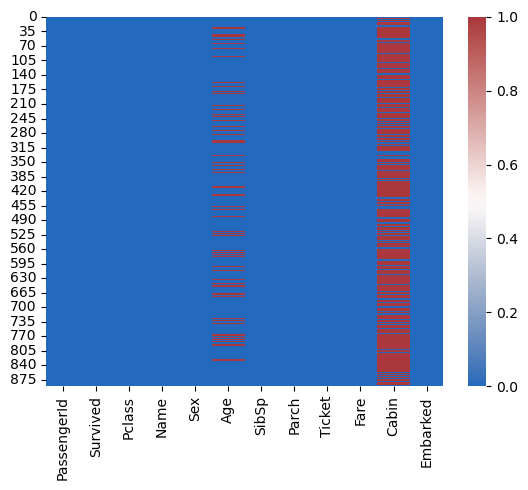

In [113]:
sns.heatmap(data_file.isnull(),cmap='vlag')
plt.show()

### More than 50% of the data of Cabin column has null values so we remove the 'Cabin' column.

In [114]:
data_file=data_file.drop(columns=['Cabin'])

In [115]:
data_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Convert 0 and 1 in a survived columns to 0->'No' and 1->'Yes'

In [116]:
def survive(value):
    if value==0:
        return 'No'
    else:
        return 'Yes'
data_file['Survived']=data_file['Survived'].apply(survive)

In [117]:
data_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Survival Counts

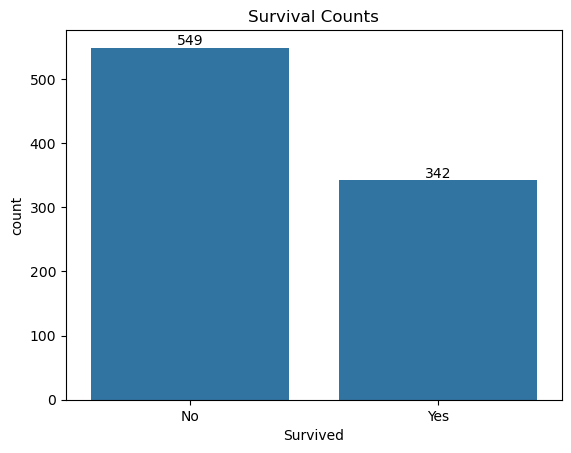

In [118]:
ax=sns.countplot(data_file,x='Survived')
ax.bar_label(ax.containers[0])
plt.title('Survival Counts')
plt.show()

## Survival Counts Based on Sex

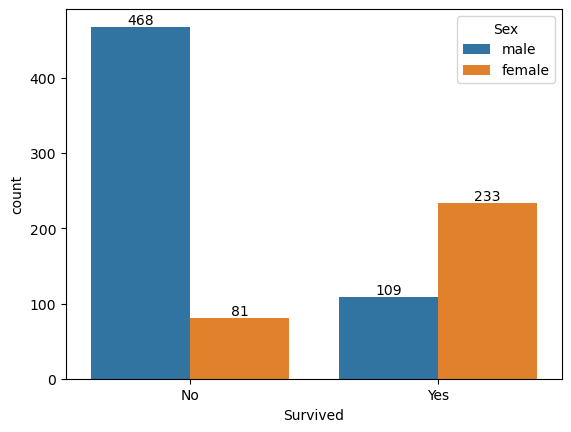

In [119]:
ax=sns.countplot(data_file,x='Survived',hue='Sex')
for value in ax.containers:
    ax.bar_label(value)
plt.show()

### In total of 342 Survival 233 were female and 109 were male. 

# Survival Rate Based On Class

### Convert 1 to '1st class', 2 to '2nd class' and 3 to '3rd class'

In [120]:
def clas(value):
    if value==1:
        return '1st class'
    elif value==2:
        return '2nd class'
    elif value==3:
        return '3rd class'
data_file['Pclass']=data_file['Pclass'].apply(clas)

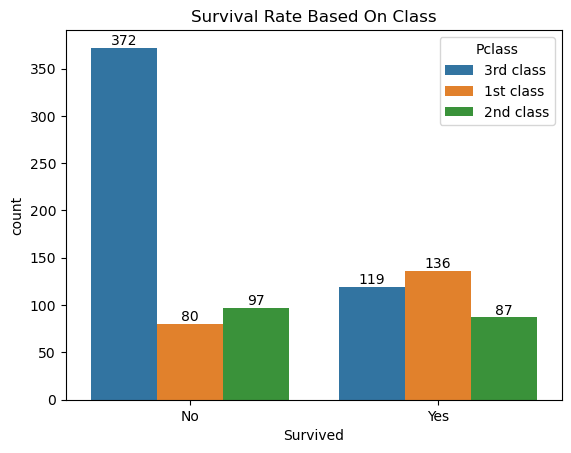

In [121]:
ax=sns.countplot(data_file,x='Survived',hue='Pclass')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Survival Rate Based On Class")
plt.show()

# Age Distribution

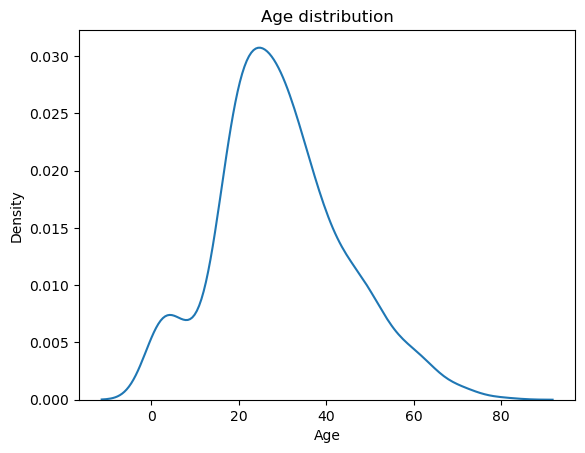

In [154]:
sns.kdeplot(data=data_file['Age']) 
plt.title("Age distribution")
plt.show()

### Passangers with the age between 20 to 40 were the highest number.

# Siblings/Spouses Count

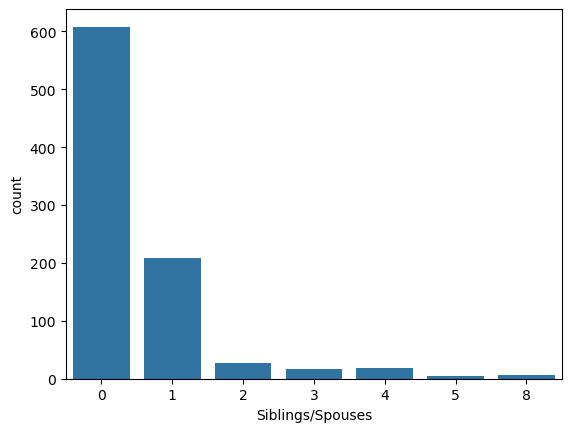

In [123]:
sns.countplot(data_file,x='SibSp')
plt.xlabel("Siblings/Spouses")
plt.title("")
plt.show()

### Maximum number of passangers had no siblings or spouses.

# Survival rate on the basis of age

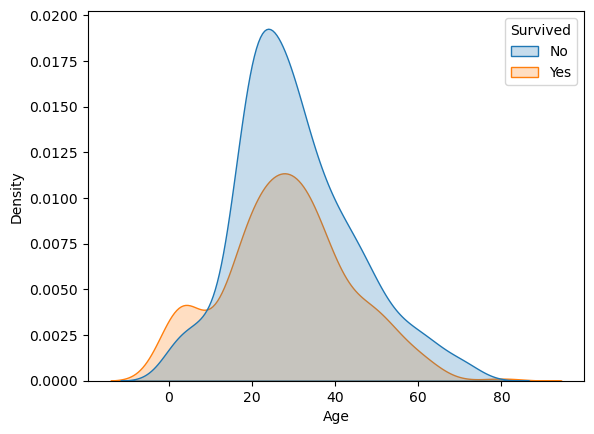

In [127]:
sns.kdeplot(data=data_file, x='Age', hue='Survived', fill=True)
plt.show()


### The survival rate of children age(1-12) were higher where as survival of old people age(60+) were higher

# Survival Analysis Based On Family Size

In [129]:
data_file['Family Size']=data_file['SibSp']+data_file['Parch']+1
data_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,1,No,3rd class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,Yes,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,Yes,3rd class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,Yes,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,No,3rd class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2nd class,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,Yes,1st class,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,No,3rd class,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,4
889,890,Yes,1st class,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


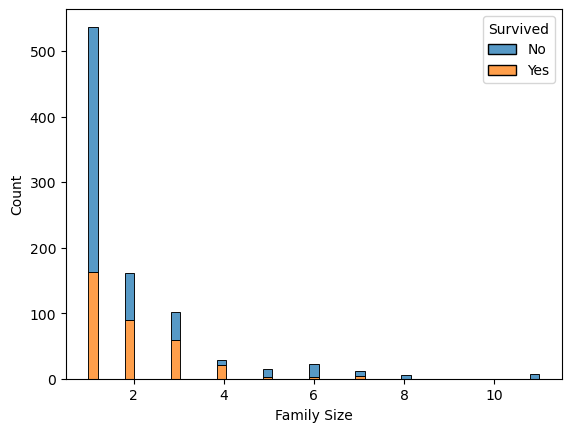

In [134]:
sns.histplot(data_file,x='Family Size', hue='Survived',multiple='stack')
plt.show()

### Solo travellers and family size with more than 5 members had lower survival rate.

# Survival Analysis Of Passangers Who Travelled Alone.

In [151]:
data_file['Alone']=(data_file['Family Size']==1).astype(int)
def conver(value):
    if value==1:
        return "Yes"
    else:
        return "No"
data_file['Alone']=data_file['Alone'].apply(conver)

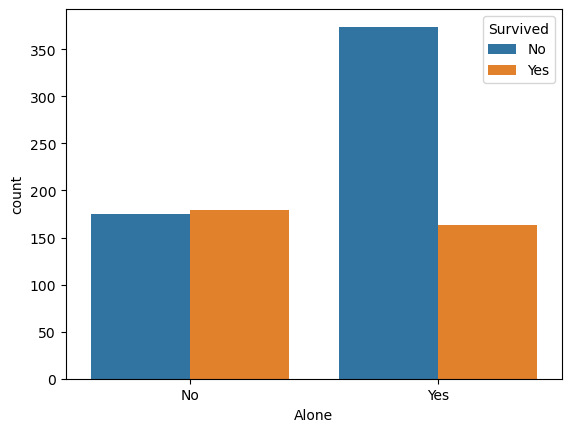

In [152]:
sns.countplot(data_file,x='Alone',hue='Survived')
plt.show()

### People who travelled alone had the lowest survival rate.